<a href="https://colab.research.google.com/github/Hengameh1392/renewable-energy/blob/main/2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# use seaborn plotting style defaults
import seaborn as sns; sns.set()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#read cvs file into dataframe
df = pd.read_csv('/content/drive/MyDrive/Renewable Data/ProductionAndCurtailmentsData_2018-2.csv')
##!pip install xlrd
##df = pd.read_excel('airquality.xls')
print(df.head())

            Date  Hour  Interval      Load  Solar    Wind  Net Load  \
0  1/1/2018 0:00     1         1  21552.67    0.0  243.50  21309.18   
1  1/1/2018 0:05     1         2  21486.78    0.0  238.50  21248.28   
2  1/1/2018 0:10     1         3  21391.30    0.0  227.23  21164.07   
3  1/1/2018 0:15     1         4  21301.87    0.0  228.03  21073.85   
4  1/1/2018 0:20     1         5  21242.27    0.0  232.21  21010.06   

  Renewables  Nuclear  Large Hydro  Imports  Generation  Thermal  \
0    2032.99  2259.99       2098.0  7586.55    13964.46  7573.07   
1    2026.48  2259.95       2144.0  7543.25    13944.80  7514.81   
2    2014.53  2259.81       2130.0  7666.71    13727.43  7322.87   
3    2016.26  2259.80       2093.0  7701.71    13598.82  7229.37   
4    2024.28  2260.01       2161.0  7677.75    13560.24  7115.31   

   Load Less (Generation+Imports)  
0                            1.65  
1                           -1.27  
2                           -2.84  
3                   

In [6]:
df.head(5)

,Date,Hour,Interval,Load,Solar,Wind,Net Load,Renewables,Nuclear,Large Hydro,Imports,Generation,Thermal,Load Less (Generation+Imports)
0,1/1/2018 0:00,1,1,21552.67,0.0,243.50,21309.18,2032.99,2259.99,2098.0,7586.55,13964.46,7573.07,1.65
1,1/1/2018 0:05,1,2,21486.78,0.0,238.50,21248.28,2026.48,2259.95,2144.0,7543.25,13944.80,7514.81,-1.27
2,1/1/2018 0:10,1,3,21391.30,0.0,227.23,21164.07,2014.53,2259.81,2130.0,7666.71,13727.43,7322.87,-2.84
3,1/1/2018 0:15,1,4,21301.87,0.0,228.03,21073.85,2016.26,2259.80,2093.0,7701.71,13598.82,7229.37,1.35
4,1/1/2018 0:20,1,5,21242.27,0.0,232.21,21010.06,2024.28,2260.01,2161.0,7677.75,13560.24,7115.31,4.28


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105120 entries, 0 to 105119
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Date                            105120 non-null  object 
 1   Hour                            105120 non-null  int64  
 2   Interval                        105120 non-null  int64  
 3   Load                            105120 non-null  float64
 4   Solar                           105120 non-null  float64
 5   Wind                            105120 non-null  float64
 6   Net Load                        105120 non-null  float64
 7   Renewables                      105120 non-null  object 
 8   Nuclear                         105120 non-null  float64
 9   Large Hydro                     105120 non-null  float64
 10  Imports                         105120 non-null  float64
 11  Generation                      105120 non-null  float64
 12  Thermal         

In [8]:
#normalize data
df = (df - df.mean())/df.std()
# Displaying DataFrame columns.
df.columns
# Some basic information about each column in the DataFrame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105120 entries, 0 to 105119
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Date                            0 non-null       object 
 1   Generation                      105120 non-null  float64
 2   Hour                            105120 non-null  float64
 3   Imports                         105120 non-null  float64
 4   Interval                        105120 non-null  float64
 5   Large Hydro                     105120 non-null  float64
 6   Load                            105120 non-null  float64
 7   Load Less (Generation+Imports)  105120 non-null  float64
 8   Net Load                        105120 non-null  float64
 9   Nuclear                         105120 non-null  float64
 10  Renewables                      0 non-null       object 
 11  Solar                           105120 non-null  float64
 12  Thermal         

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [9]:
df["Thermal"] = df.Thermal.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105120 entries, 0 to 105119
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Date                            0 non-null       object 
 1   Generation                      105120 non-null  float64
 2   Hour                            105120 non-null  float64
 3   Imports                         105120 non-null  float64
 4   Interval                        105120 non-null  float64
 5   Large Hydro                     105120 non-null  float64
 6   Load                            105120 non-null  float64
 7   Load Less (Generation+Imports)  105120 non-null  float64
 8   Net Load                        105120 non-null  float64
 9   Nuclear                         105120 non-null  float64
 10  Renewables                      0 non-null       object 
 11  Solar                           105120 non-null  float64
 12  Thermal         

In [10]:
df["Renewables"] = df.Renewables.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105120 entries, 0 to 105119
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Date                            0 non-null       object 
 1   Generation                      105120 non-null  float64
 2   Hour                            105120 non-null  float64
 3   Imports                         105120 non-null  float64
 4   Interval                        105120 non-null  float64
 5   Large Hydro                     105120 non-null  float64
 6   Load                            105120 non-null  float64
 7   Load Less (Generation+Imports)  105120 non-null  float64
 8   Net Load                        105120 non-null  float64
 9   Nuclear                         105120 non-null  float64
 10  Renewables                      0 non-null       float64
 11  Solar                           105120 non-null  float64
 12  Thermal         

In [11]:
observations = list(df.index)
variables = list(df.columns)

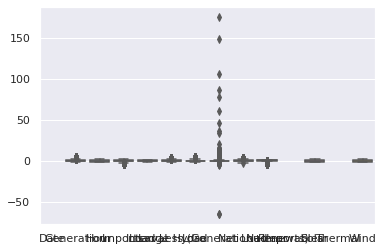

In [12]:
sns.boxplot(data=df, orient="v", palette="Set2")

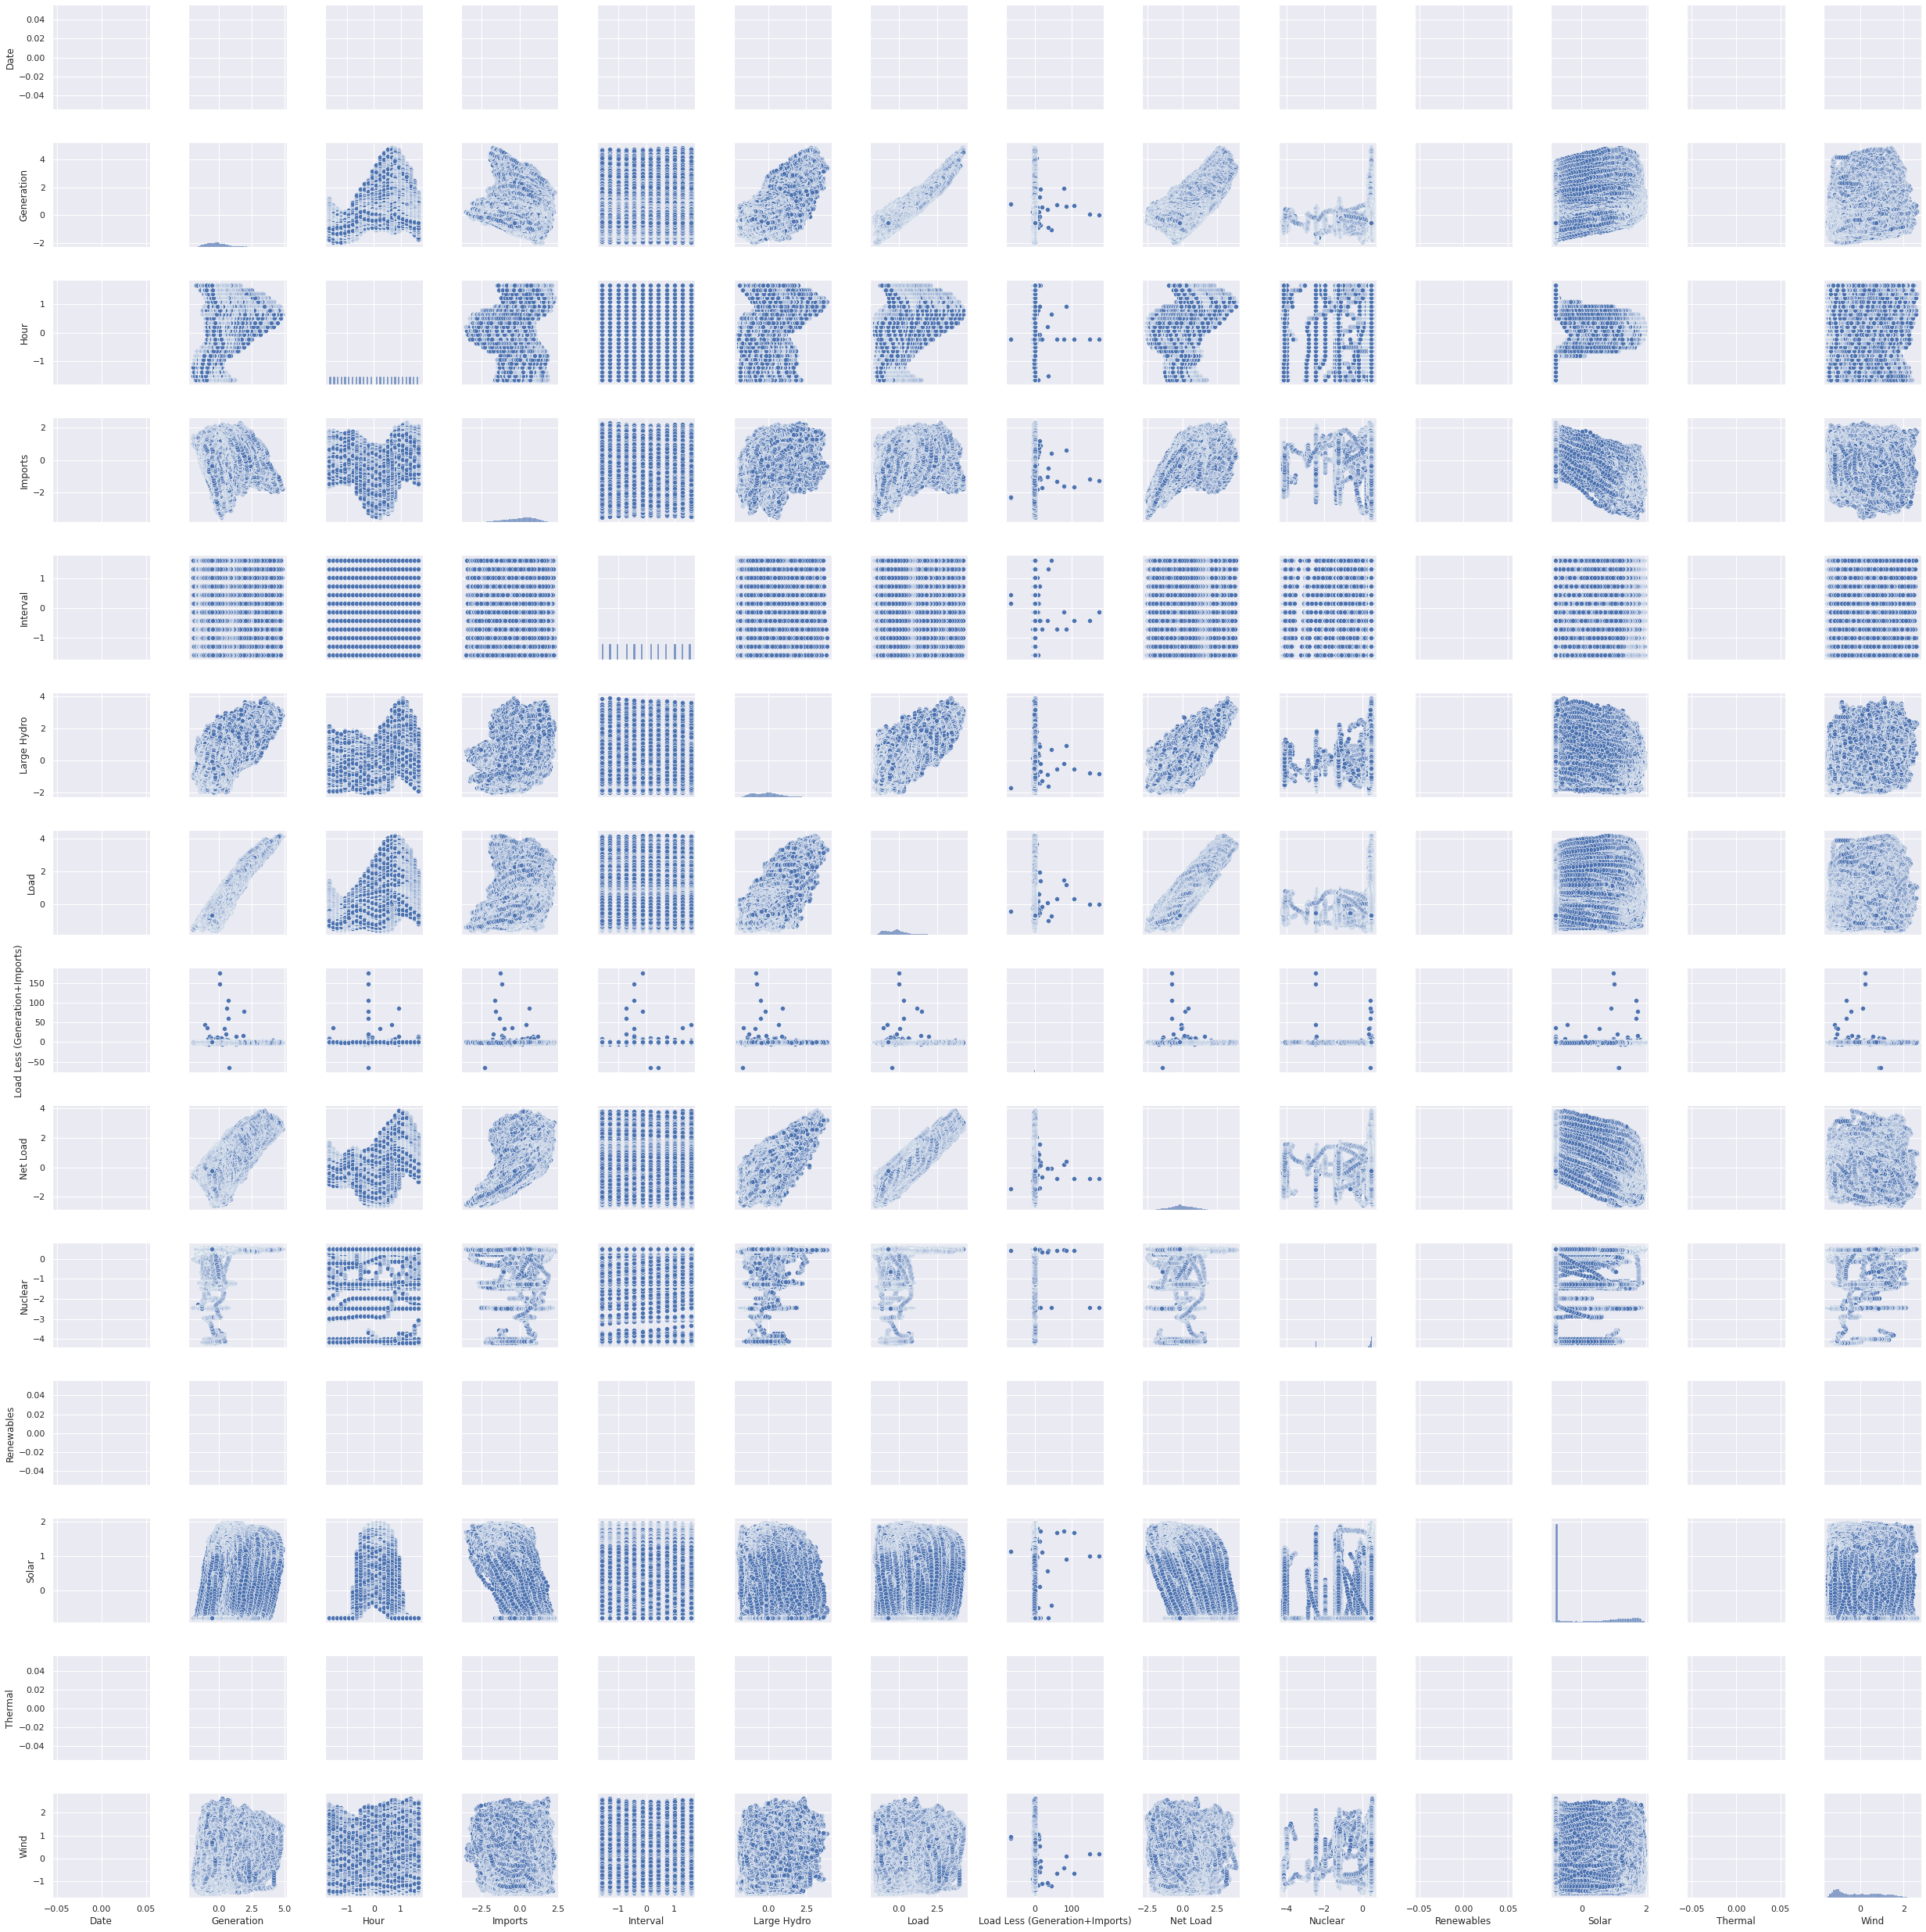

In [14]:
sns.pairplot(df)

In [21]:
pandas.Series.astype

NameError: ignored

In [20]:
df["Renewables"] = pd.to_numeric(df.Renewbles, errors='coerce')

AttributeError: ignored

In [ ]:
#df['Solar'] = pd.to_numeric(df['Solar'], errors='coerce')

In [ ]:
df['Renewables'] = pd.to_numeric(df['Renewables'], errors='coerce')

In [ ]:
#df['Load'] = pd.to_numeric(df['Load'], errors='coerce')

In [ ]:
#df['Renewables'] = pd.to_numeric(df['Renewables'], errors='coerce')

In [ ]:
#df['Wind'] = pd.to_numeric(df['Wind'], errors='coerce')

In [ ]:
#df['Net Load'] = pd.to_numeric(df['Net Load'], errors='coerce')

In [ ]:
#df['Nuclear'] = pd.to_numeric(df['Nuclear'], errors='coerce')

In [ ]:
df['Large Hydro'] = pd.to_numeric(df['Large Hydro'], errors='coerce')

In [ ]:
#df['Generation'] = pd.to_numeric(df['Generation'], errors='coerce')

In [ ]:
df['Thermal'] = pd.to_numeric(df['Thermal'], errors='coerce')

In [ ]:
#df['Load Less (Generation+Imports)'] = pd.to_numeric(df['Load Less (Generation+Imports)'], errors='coerce')

In [ ]:
#df['Imports'] = pd.to_numeric(df['Imports'], errors='coerce')

In [ ]:
#df['Solar'] = df['Solar'].astype(float).round(2)


In [ ]:
df.shape

(324576, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324576 entries, 0 to 324575
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Date                            105120 non-null  object 
 1   Hour                            105120 non-null  float64
 2   Interval                        105120 non-null  float64
 3   Load                            105120 non-null  float64
 4   Solar                           105120 non-null  float64
 5   Wind                            105120 non-null  float64
 6   Net Load                        105120 non-null  float64
 7   Renewables                      105071 non-null  float64
 8   Nuclear                         105120 non-null  float64
 9   Large Hydro                     0 non-null       float64
 10  Imports                         105120 non-null  float64
 11  Generation                      105120 non-null  float64
 12  Thermal         

In [ ]:
df.describe()

,Hour,Interval,Load,Solar,Wind,Net Load,Renewables,Nuclear,Large Hydro,Imports,Generation,Thermal,Load Less (Generation+Imports)
count,105120.000000,105120.000000,105120.000000,105120.000000,105120.000000,105120.000000,105071.000000,105120.000000,0.0,105120.000000,105120.000000,105071.000000,105120.000000
mean,12.499886,6.500000,25806.873479,3171.135837,1888.611721,20747.125917,6915.051524,2089.185206,NaN,7015.301168,18791.532846,7349.527703,0.039464
std,6.922384,3.452069,4927.633413,3884.071107,1253.561968,5351.536247,3887.367594,389.129005,NaN,2244.479495,5054.275192,3717.767212,14.751431
min,1.000000,1.000000,17981.550000,0.000000,0.000000,6967.970000,1665.470000,459.830000,NaN,-887.070000,9008.870000,500.560000,-962.490000
25%,6.750000,3.750000,22229.665000,0.000000,700.142500,17225.120000,3715.590000,2221.647500,NaN,5508.670000,15182.812500,4698.455000,-2.460000
50%,12.500000,6.500000,24989.715000,63.295000,1767.440000,20316.775000,5581.690000,2259.080000,NaN,7339.240000,17998.610000,6965.780000,0.000000
75%,18.250000,9.250000,27730.042500,7191.465000,2921.722500,24063.145000,10581.495000,2272.600000,NaN,8704.190000,21118.922500,9370.915000,2.410000
max,24.000000,12.000000,46396.990000,10735.880000,5166.750000,41277.560000,17082.630000,2288.390000,NaN,12094.620000,43160.270000,25072.150000,2588.520000
